In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("forbes_billionaire_dataset.csv")
df.head()

,rank,name,age,source,country_citizenship,net_worth
0,1,Bill Gates,62,Microsoft,United States,8.600000e+10
1,2,Warren Buffett,87,Berkshire Hathaway,United States,7.560000e+10
2,3,Jeff Bezos,53,Amazon.com,United States,7.280000e+10
3,4,Amancio Ortega,81,Zara,Spain,7.130000e+10
4,5,Mark Zuckerberg,33,Facebook,United States,5.600000e+10


In [3]:
df.describe()

,rank,age,net_worth
count,2043.000000,2043.000000,2.043000e+03
mean,992.315712,-3070.535977,4.094714e+09
std,568.182068,17435.296472,1.651034e+10
min,1.000000,-100000.000000,1.000000e+09
25%,501.000000,53.000000,1.400000e+09
50%,973.000000,63.000000,2.100000e+09
75%,1468.000000,73.000000,3.700000e+09
max,1940.000000,102.000000,7.000000e+11


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["name"]=le.fit_transform(df["name"])
df["source"]=le.fit_transform(df["source"])
df["country_citizenship"]=le.fit_transform(df["country_citizenship"])

In [5]:
df['age']=df['age'].replace(-100000,df['age'].median())
df['net_worth']=df['net_worth'].replace(700000000000.0,df['net_worth'].median())

In [6]:
df.head()

,rank,name,age,source,country_citizenship,net_worth
0,1,203,62,71,68,8.600000e+10
1,2,1887,87,11,68,7.560000e+10
2,3,810,53,4,68,7.280000e+10
3,4,83,81,129,56,7.130000e+10
4,5,1209,33,38,68,5.600000e+10


In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler
std_scale = preprocessing.StandardScaler().fit(df[['net_worth']])
df[['net_worth']] = std_scale.transform(df[['net_worth']]) 

In [8]:
df

,rank,name,age,source,country_citizenship,net_worth
0,1,203,62,71,68,13.843542
1,2,1887,87,11,68,12.093047
2,3,810,53,4,68,11.621759
3,4,83,81,129,56,11.369284
4,5,1209,33,38,68,8.794035
...,...,...,...,...,...,...
2038,1940,1962,53,141,9,-0.463395
2039,1940,526,44,290,64,-0.463395
2040,1940,1998,59,342,9,-0.463395
2041,1940,1999,50,533,9,-0.463395


In [15]:
df.describe()

,rank,name,age,source,country_citizenship,net_worth
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,992.315712,1020.158101,64.085658,397.146353,39.557024,0.000000
std,568.182068,589.157556,13.013592,187.627307,24.819664,1.000245
min,1.000000,0.000000,21.000000,0.000000,0.000000,-0.463395
25%,501.000000,510.500000,54.000000,258.000000,16.000000,-0.396068
50%,973.000000,1020.000000,63.000000,422.000000,42.000000,-0.278246
75%,1468.000000,1530.500000,73.000000,570.500000,68.000000,-0.008939
max,1940.000000,2039.000000,102.000000,738.000000,70.000000,13.843542


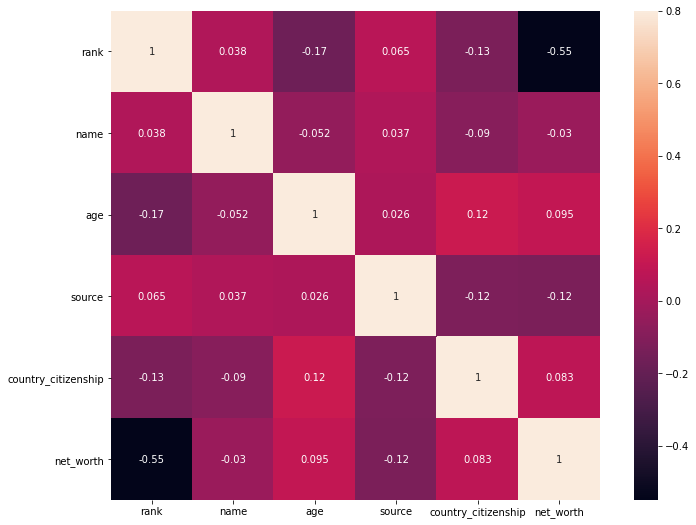

In [53]:
import seaborn as sns
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

In [54]:
# import graph objects as "go"
import plotly.graph_objs as go
import plotly.offline as pyoff
# creating trace1
data =go.Scatter(
                    x = df['age'],
                    y = df['net_worth'],
                    mode = "markers",
                    name = "",
                    marker = dict(color = df['rank'], showscale = True)
                    )



layout = dict(title = 'net_worth vs age',
              yaxis= dict(title= 'net_worth',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'age',ticklen= 5,zeroline= False),
              plot_bgcolor='rgba(0,0,0,0)'
             )
fig = dict(data = data, layout = layout)
pyoff.iplot(fig)

In [55]:
# import graph objects as "go"
import plotly.graph_objs as go
import plotly.offline as pyoff
# creating trace1
data =go.Scatter(
                    x = df['rank'],
                    y = df['net_worth'],
                    mode = "markers",
                    name = "",
                    marker = dict(color = df['age'], showscale = True)
                    )



layout = dict(title = 'net_worth vs rank',
              yaxis= dict(title= 'net_worth',ticklen= 5,zeroline= False),
              xaxis= dict(title= 'rank',ticklen= 5,zeroline= False),
              plot_bgcolor='rgba(0,0,0,0)'
             )
fig = dict(data = data, layout = layout)
pyoff.iplot(fig)

In [9]:
Y=df['net_worth']
X=df.drop(columns='net_worth',axis=1)

In [10]:
import sklearn 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
from sklearn import linear_model
lm=linear_model.LinearRegression()
lm.fit(X_train,Y_train)
Y_predict=lm.predict(X_test)

Text(0.5, 1.0, 'Linear Regression')

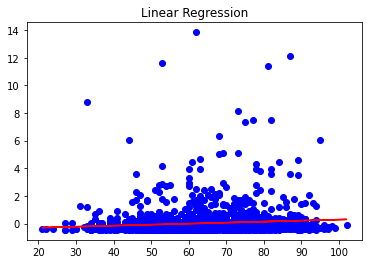

In [11]:
x1=df['age'].values.reshape(-1,1)
y1=df['net_worth']
X_train1,X_test1,Y_train1,Y_test1=train_test_split(x1,y1,test_size=0.2)

plt.scatter(X_train1, Y_train1, color = 'blue') 
from sklearn import linear_model
lm=linear_model.LinearRegression()
lm.fit(X_train1,Y_train1) 
plt.plot(X_train1, lm.predict(X_train1), color = 'red') 
plt.title('Linear Regression') 


In [12]:
mean_squared_error_simple=sklearn.metrics.mean_squared_error(Y_test,Y_predict)
mean_squared_error_simple

0.6018051722305119

In [42]:
import math
rmse_simple=math.sqrt(mean_squared_error_simple)
rmse_simple

0.7757610277853044

In [17]:
sklearn.metrics.r2_score(Y_test,Y_predict)

0.33486919193011544

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor(learning_rate=0.1)
gb.fit(X_train,Y_train)
Y_predict=gb.predict(X_test)

print(sklearn.metrics.r2_score(Y_test,Y_predict))

0.9929255354884745


In [19]:
mean_squared_error_gd=sklearn.metrics.mean_squared_error(Y_test,Y_predict)
mean_squared_error_gd

0.0064009203635474006

In [43]:
rmse_gd=math.sqrt(mean_squared_error_gd)
rmse_gd

0.08000575206538216

In [20]:
#find best learning rate and score using GridCV
from sklearn.model_selection import GridSearchCV
parameters={'learning_rate':[0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6]}
gb_mse=GridSearchCV(gb,parameters,scoring="neg_mean_squared_error", cv=7)
gb_mse.fit(X,Y)

GridSearchCV(cv=7, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [21]:

print(gb_mse.best_params_)
print(gb_mse.best_score_)  

{'learning_rate': 0.1}
-0.7994983251613713


In [22]:
#lasso

lasso=Lasso()
lasso.fit(X_train,Y_train)
Y_predict=lasso.predict(X_test)
mean_squared_error_lasso=sklearn.metrics.mean_squared_error(Y_test,Y_predict)
mean_squared_error_lasso

0.6003488290254274

In [44]:
rmse_lasso=math.sqrt(mean_squared_error_lasso)
rmse_lasso

0.7748218046915222

In [23]:
#r2 score for lasso

sklearn.metrics.r2_score(Y_test,Y_predict)

0.3364787805104772

In [24]:
#find best param using grid search cv
lasso2=Lasso()
parameters={'alpha':[0.001,0.01,0.02,0.1,0.2,0.5]}
lasso_regressor=GridSearchCV(lasso2,parameters,scoring='neg_mean_squared_error',cv=7)
lasso_regressor.fit(X_train,Y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.1, 0.2, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [25]:
lasso_regressor.best_score_

-0.7237461645554912

In [26]:
lasso_regressor.best_params_

{'alpha': 0.5}

In [27]:
#ridge

ridge=Ridge()
ridge.fit(X_train,Y_train)
Y_predict=ridge.predict(X_test)
mean_squared_error_ridge=sklearn.metrics.mean_squared_error(Y_test,Y_predict)
mean_squared_error_ridge


0.6018051716151814

In [46]:
rmse_ridge=math.sqrt(mean_squared_error_ridge)
rmse_ridge

0.7757610273887064

In [28]:
#r2 score for ridge

sklearn.metrics.r2_score(Y_test,Y_predict)

0.33486919261019465

In [29]:
#find best param using grid search cv

parameters={'alpha':[0.001,0.01,0.02,0.1,0.2,0.5]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=7)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.02, 0.1, 0.2, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [30]:
ridge_regressor.best_params_

{'alpha': 0.5}

In [31]:
ridge_regressor.best_score_

-0.7261291902606762

In [32]:
#elastic net
from sklearn.linear_model import ElasticNet
e_net=ElasticNet(alpha=0.1)
e_net.fit(X_train,Y_train)
y_predict = e_net.predict(X_test)
mean_squared_error_elastic =sklearn.metrics.mean_squared_error(Y_test,Y_predict)
mean_squared_error_elastic

0.6018051716151814

In [47]:
rmse_elastic=math.sqrt(mean_squared_error_elastic)
rmse_elastic

0.7757610273887064

In [33]:
#r2 score for elasticnet
sklearn.metrics.r2_score(Y_test,Y_predict)

0.33486919261019465

In [34]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures 
poly=PolynomialFeatures(degree=4)
X_poly=poly.fit_transform(X_train)
poly.fit(X_train,Y_train)
lm2=linear_model.LinearRegression()
lm2.fit(X_poly,Y_train)
Y_predict=lm2.predict(X_poly)

In [36]:
#r2 score for poly
#sklearn.metrics.r2_score(Y_test,Y_predict)
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# Create linear regression object
poly = PolynomialFeatures(degree=3)
X_poly=poly.fit_transform(X)



model = linear_model.LinearRegression()
model.fit(X_poly,Y)
poly.fit(X_poly,Y)


PolynomialFeatures(degree=3, include_bias=True, interaction_only=False,
                   order='C')

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
rmses = []
degrees = np.arange(1, 10)
min_rmse, min_deg = 1e10, 0
min_mse=0
r2_score=0
for deg in degrees:

    # Train features
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    x_poly_train = poly_features.fit_transform(X_train)

    # Linear regression
    poly_reg = LinearRegression()
    poly_reg.fit(x_poly_train, Y_train)

    # Compare with test data
    x_poly_test = poly_features.fit_transform(X_test)
    poly_predict = poly_reg.predict(x_poly_test)
    poly_mse = mean_squared_error(Y_test, poly_predict)
    poly_rmse = np.sqrt(poly_mse)
    poly_r2 = sklearn.metrics.r2_score(Y_test, poly_predict)
    rmses.append(poly_rmse)
    
    # Cross-validation of degree
    if min_rmse > poly_rmse:
        min_rmse = poly_rmse
        min_deg = deg
        min_mse = poly_mse
        r2_score = poly_r2
# Plot and present results
print('Best degree {} with RMSE {}, MSE {} and r2 score {}'.format(min_deg, min_rmse, min_mse, r2_score))

Best degree 5 with RMSE 0.49226702746150236, MSE 0.2423268263257835 and r2 score 0.7321740569066729


Text(0, 0.5, 'RMSE')

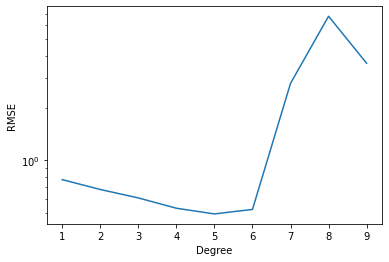

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
lm2 = linear_model.LinearRegression()
lm2_mse = cross_val_score(lm2,X,Y, scoring="neg_mean_squared_error", cv=7)

lm2_mse
lm2_mse.mean()

-1.0585386550401723